In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Adjust the parameters to ensure compatibility
X, y = make_classification(
    n_samples=100,      # Number of samples
    n_features=2,       # Total number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_repeated=0,       # Number of repeated features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)  # Soft margin with default C

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [6]:
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



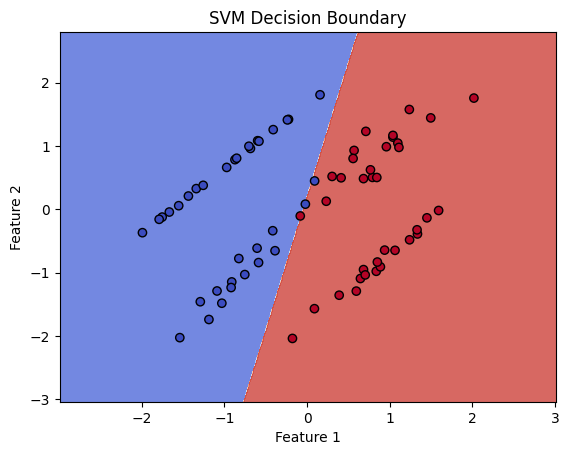

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh to plot decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()